<a href="https://colab.research.google.com/github/AKHIL-882/Data-Science-Internship/blob/main/DataScience__Task_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Market Prediction using Numerical and Textual Analysis**


**Aim: To Create a hybrid model for stock price prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines**

## **Sentimental Analysis of News headlines**


### **Importing the Requireed Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
# pip install TextBlob

**Reading dataset directly from google and
Printing the first 5 rows of the dataset**

In [4]:
dataset = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/DPQMQH/P2Z4PM')
dataset.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


**Printing the last 5 rows of the dataset**

In [5]:
dataset.tail()

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


### **1. Exploratory Data Analysis - Checking the types of data and basic summary stats.**

There are three features - **Publish Data, HeadLine Category and HeadLine Text**.The main aim is to do **sentimental analysis** of the news HeadLines.

**1.1 Displaying datatype of each column and also display the non-null row**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


**Observation**: We can find that only the **publish_date is of integer type** where as **headline_category and headline_text are of object**

**1.2 Finding the categorical variables**

In [7]:
dataset['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
ballot-talk                     7
delhi-ncr                       7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

**1.3 Dividing the news based on cities**

In [8]:
city_vise = dataset[dataset['headline_category'].str.contains('^city\.[a-z]+$', regex=True
                                                               )]
city_vise

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
3297139,20200630,city.delhi,Remove illegal signage or face penalty: NDMC
3297158,20200630,city.bengaluru,what bengaluru can do to tackle covid surge
3297161,20200630,city.bengaluru,karnataka may adopt keralas triple lockdown plan
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...


**Observation**: Now we have split the dataset based on cities for easy analysis

**1.4 Seperating city name from dataset**

In [9]:
city = pd.DataFrame(columns=['city_name'])

In [10]:
city['city_name'] = city_vise.headline_category.str.split('.',expand=True)[1]

In [11]:
city_vise = pd.concat([city_vise,city],axis = 1)

In [12]:
city_vise.drop(columns=['headline_category'],axis=1,inplace=True)

In [13]:
city_vise.reset_index(inplace = True)

In [14]:
city_vise.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [15]:
city_vise.city_name.unique()

array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

**1.5 Finding the city with most headlines**

In [16]:
city_head = city_vise.groupby(['city_name']).agg({'headline_text':'count'})

In [17]:
city_headline_count = city_head.sort_values(by='headline_text',ascending=False)
most_headline_city = city_headline_count.head(10)
most_headline_city

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


**1.6 Visualizing the headline count**

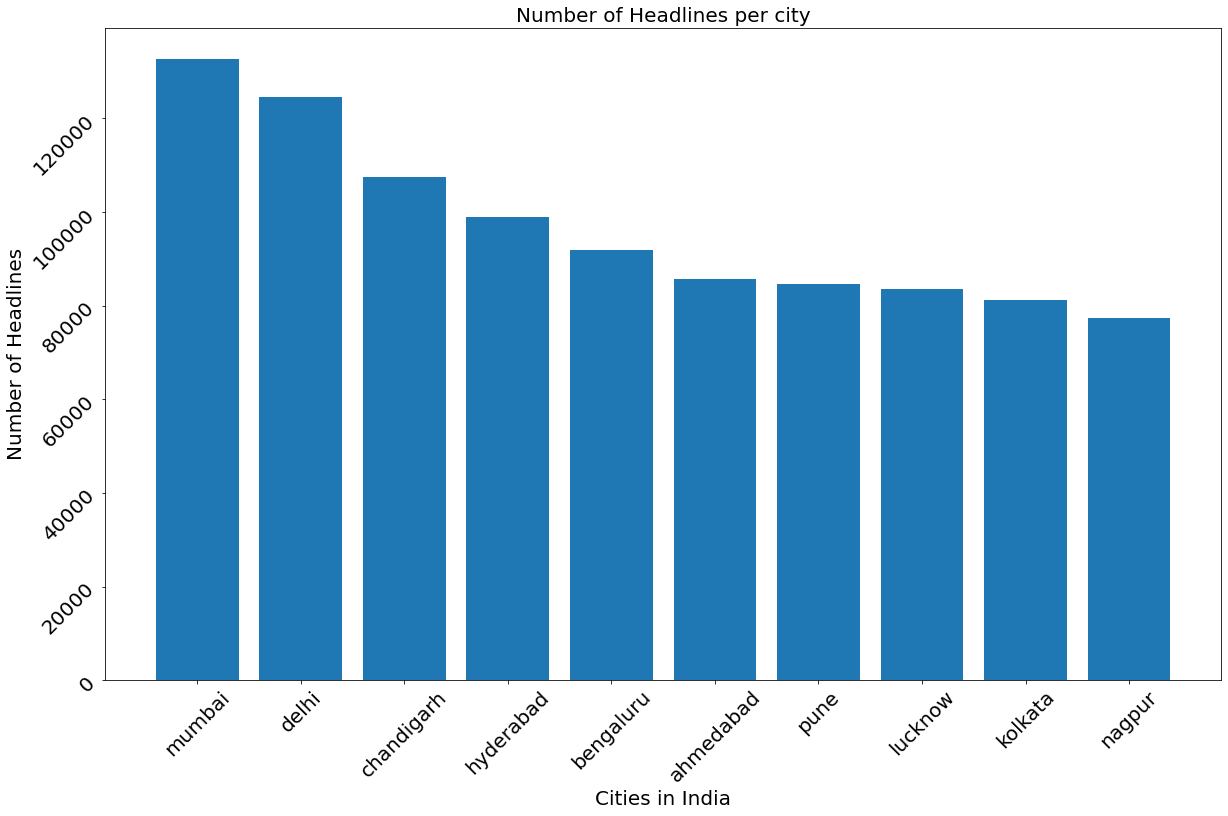

In [18]:
plt.figure(figsize=(20,12))
plt.bar(most_headline_city.index,height=most_headline_city['headline_text'])
plt.xticks(rotation = 45,fontsize=20)
plt.yticks(rotation = 45,fontsize=20)
plt.xlabel('Cities in India',fontsize=20)
plt.ylabel('Number of Headlines',fontsize=20)
plt.title('Number of Headlines per city',fontsize=20)
plt.show()

**Observation**: We can find that **Mumbai** has highest headlines over the remaining countries followed by **Delhi** and **Chandigarh**

### **2. Checking Year and Most coverage cities**

**2.1 Converting the publish_data datatype as date time**

In [19]:
city_vise['publish_date'] = pd.to_datetime(city_vise['publish_date'])
city_vise.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


**2.2 Extracting the Year**

In [20]:
city_vise['Year'] = city_vise['publish_date'].apply(lambda x: (x.microsecond)//10)

In [21]:
city_vise.drop(columns=['publish_date','index'],axis=1,inplace=True)

In [22]:
city_vise.head()

,headline_text,city_name,Year
0,Three in race for chief secy's post,bengaluru,2001
1,Druggists' stir leads to shortage of medicines,patna,2001
2,He's not so inscrutable,bengaluru,2001
3,DPCC stages Nyay rally,delhi,2001
4,Fend for yourselves; Pande tells doctors,patna,2001


**2.3 Creating a new column to count headlines**

In [23]:
city_vise_dup = city_vise.copy()
city_vise_dup['Headlines Count'] = 1
city_vise_dup.head()

,headline_text,city_name,Year,Headlines Count
0,Three in race for chief secy's post,bengaluru,2001,1
1,Druggists' stir leads to shortage of medicines,patna,2001,1
2,He's not so inscrutable,bengaluru,2001,1
3,DPCC stages Nyay rally,delhi,2001,1
4,Fend for yourselves; Pande tells doctors,patna,2001,1


In [24]:
most_headline_city.head()

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857


In [25]:
city_vise_year_count = pd.Series(city_vise_dup.groupby(['Year'])['headline_text'].count())


In [26]:
city_vise_year_count.head()

Year
2001    31365
2002    53721
2003    48409
2004    34030
2005    15788
Name: headline_text, dtype: int64

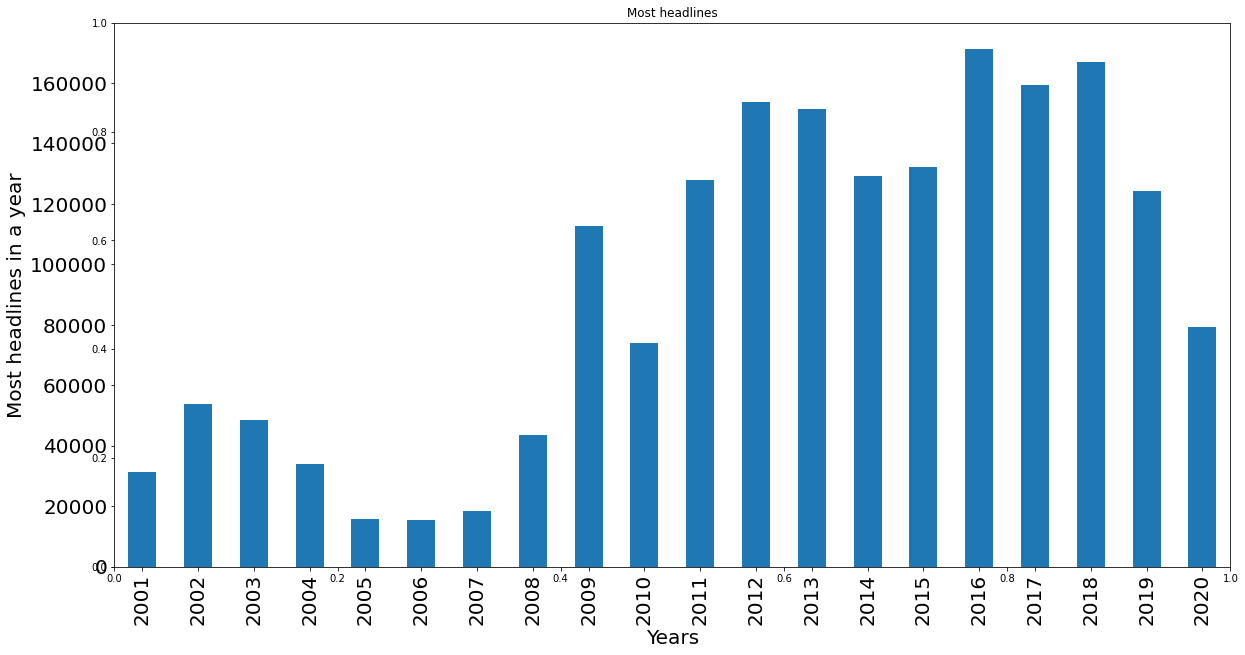

<Figure size 1440x720 with 0 Axes>

In [27]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_vise_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Most headlines" ,fontsize = 20)
a.set_ylabel('Most headlines in a year',fontsize=20)
a.set_xlabel("Years",fontsize = 20)



plt.show()

**Observation**: We can find that **2016** has the most news headlines.

### **3. Topic Most Covered**

In [28]:
dataset.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [29]:
new_dataset = dataset.copy()

In [30]:
new_dataset['category'] = new_dataset['headline_category'].str.split('.').map(lambda x: x[0])

In [31]:
new_dataset.head()

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,20010102,unknown,Fissures in Hurriyat over Pak visit,unknown
3,20010102,unknown,America's unwanted heading for India?,unknown
4,20010102,unknown,For bigwigs; it is destination Goa,unknown


**3.1 Finding the top most category**

In [32]:
new_dataset_top_categoris = new_dataset.groupby(['category']).agg({'headline_text':'count'}).sort_values(by = 'headline_text',ascending =False)

In [33]:
new_dataset_top_categoris_top = new_dataset_top_categoris.drop(['unknown','tv','top-stories','city','citizen','edit-page','top-headlines','world']).head(10)
new_dataset_top_categoris_top

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


In [34]:
new_dataset_top_categoris_top.reset_index(inplace = True)
new_dataset_top_categoris_top

,category,headline_text
0,india,285619
1,entertainment,224877
2,business,153876
3,sports,129494
4,home,77208
5,life-style,43370
6,tech,37220
7,news,13987
8,elections,9003
9,delhi-times,7356


**Observation**: We can find that **India, Entertainment and business** are the most categories.

**3.2 Visualizing**

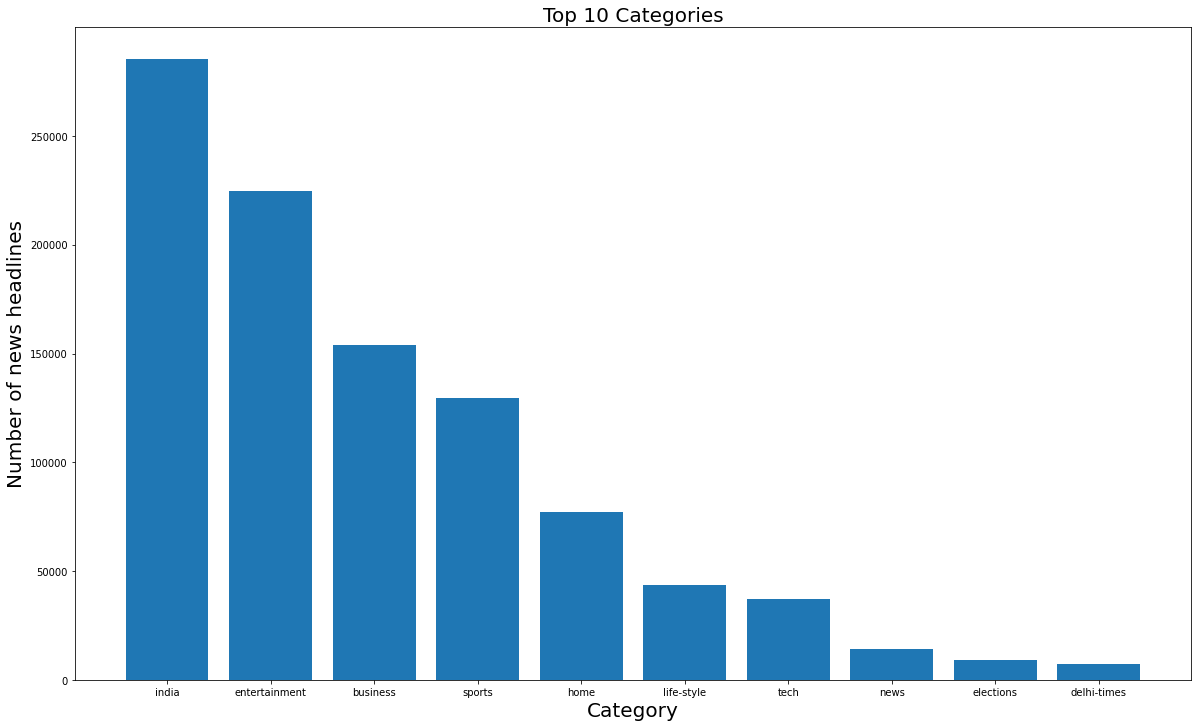

In [35]:
plt.figure(figsize=(20,12))
plt.bar(new_dataset_top_categoris_top.category, height=new_dataset_top_categoris_top.headline_text)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Number of news headlines',fontsize = 20)
plt.title('Top 10 Categories',fontsize = 20)
plt.show()

### **4. Sentimental Analysis**

**4.1 Sentimental Analysis using TextBlob**

In [36]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [37]:
dataset['Result'] = np.array([getAnalysis_polarity(headline)
for headline in dataset['headline_text']])

In [38]:
dataset.head()

,publish_date,headline_category,headline_text,Result
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
3,20010102,unknown,America's unwanted heading for India?,neutral
4,20010102,unknown,For bigwigs; it is destination Goa,neutral


**4.2 Categoring the Variables**

In [39]:
summary = dataset.groupby(['Result']).agg({'headline_text' : 'count'})

**4.3 Visualizing the summary**

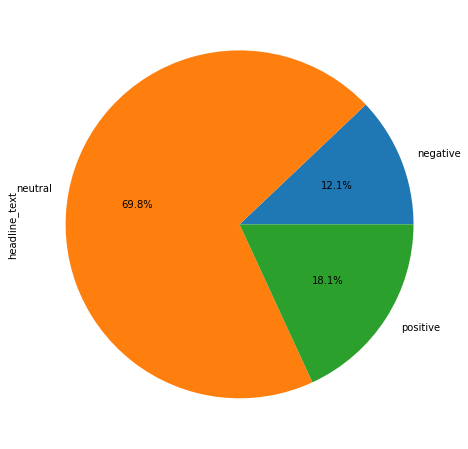

In [40]:
plt.figure(figsize = (8,8))
summary['headline_text'].plot.pie(autopct = '%1.1f%%')
plt.show()

In [41]:
negative = (summary.loc['negative'] / len(dataset))*100
neutral = (summary.loc['neutral'] / len(dataset))*100
positive = (summary.loc['positive'] / len(dataset))*100

In [42]:
print(' Positive Headlines: ' , positive )
print('\n\n Negative Headlines: ' ,negative )
print('\n\n Neutral Headlines: ' , str(neutral))

 Positive Headlines:  headline_text    18.11792
Name: positive, dtype: float64


 Negative Headlines:  headline_text    12.076834
Name: negative, dtype: float64


 Neutral Headlines:  headline_text    69.805245
Name: neutral, dtype: float64


**Conclusion**: We can observe that there are most of **neutral headlines** overall

## **Stock Price Prediction**

**Importing the Required Libraries**

In [44]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
dataset = pd.read_csv("Stock_Data.csv")
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


### **1. Exploratory Data Analysis - Checking the types of data and basic summary stats.**

**1.1 Displaying datatype of each column and also display the non-null row**

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


**1.2 Display the Summary stats which include count, mean, std, min, max etc**

In [54]:
dataset.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


**1.3 Finding the correlation between High and Low**

In [55]:
High = dataset['High']
Low = dataset['Low']
correlation = High.corr(Low)
correlation


0.9993727795805165

**Observation**: We can find that there is correlation of **0.99 %** between High and Low

**1.4 Finding Correlation by Pearson methon**

In [56]:
corr = dataset.corr(method = "pearson")
corr

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999592,0.999436,0.998991,-0.691621,0.998991
High,0.999592,1.000000,0.999373,0.999546,-0.686997,0.999546
Low,0.999436,0.999373,1.000000,0.999595,-0.699572,0.999595
Close,0.998991,0.999546,0.999595,1.000000,-0.694281,1.000000
Volume,-0.691621,-0.686997,-0.699572,-0.694281,1.000000,-0.694281
Adj Close,0.998991,0.999546,0.999595,1.000000,-0.694281,1.000000


**1.5 Number of unique in each Column**

In [57]:
dataset.nunique()

Date         1989
Open         1980
High         1983
Low          1980
Close        1978
Volume       1897
Adj Close    1978
dtype: int64

### **2. Visualization**

**2.1 Visualizing Dataset using Pairplot**

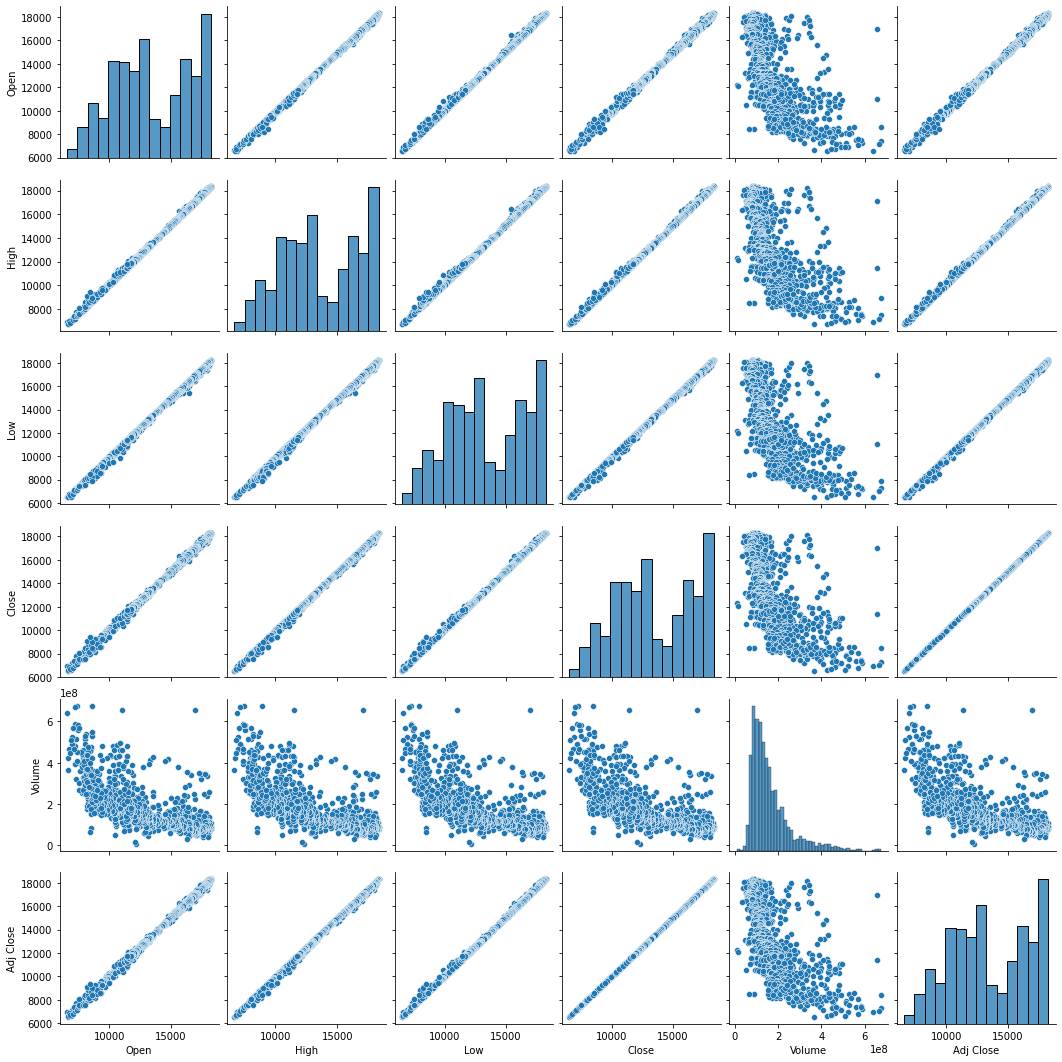

In [58]:
sns.pairplot(dataset)

**Observation**: We can find that there is a **linear relationship** between the attributes

**2.2 Finding Correlation using Heatmap**

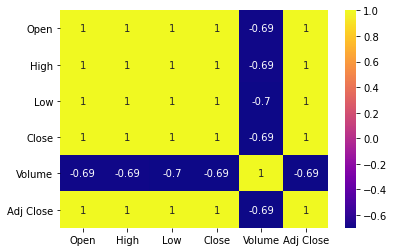

In [59]:
sns.heatmap(dataset.corr(),annot=True,cmap = 'plasma')

**Observation**: Except **Adj Close, Volume** remaining attributes are linear in nature

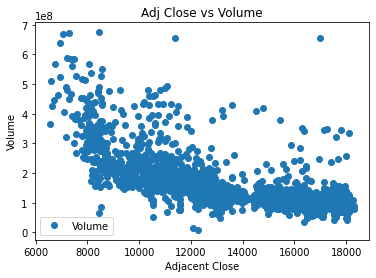

In [61]:
dataset.plot(x='Adj Close', y='Volume', style='o')  
plt.title('Adj Close vs Volume')  
plt.xlabel('Adjacent Close')  
plt.ylabel('Volume')  
plt.show()

**2.3 Plotting Close Price**

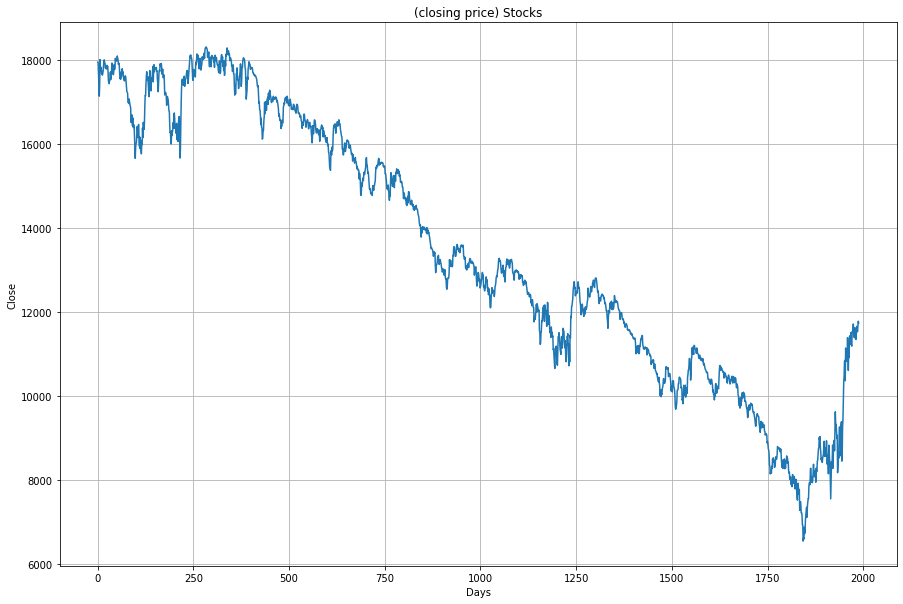

In [62]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(dataset['Close'])
plt.xlabel('Days')
plt.ylabel('Close')
plt.title('(closing price) Stocks')
plt.show()

**2.4 Plotting open price**

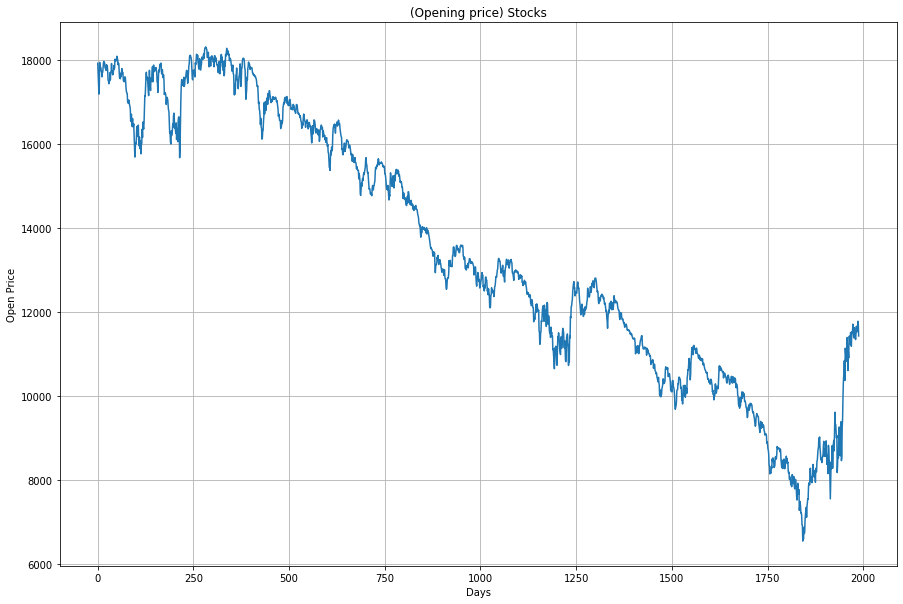

In [63]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(dataset['Open'])
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('(Opening price) Stocks')
plt.show()

**2.5 Representing cummulative return**

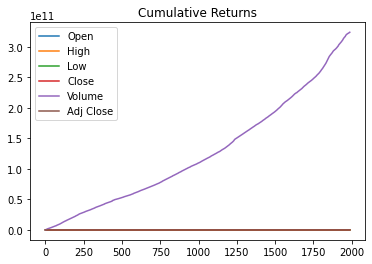

In [64]:
cumsum_data = dataset.cumsum()
cumsum_data.plot()
plt.title('Cumulative Returns')
plt.show()

## **3. Building the Machine Learning Model**

In [77]:
test = dataset[dataset['Date'] > '2015-01-1']
train = dataset[dataset['Date'] < '2020-01-1']

In [78]:
test.shape, train.shape

((372, 7), (1989, 7))

**3.1 Spliting the dataset**

In [79]:
test_data = test['Open']
train_data = train['Open']
test_data.shape, train_data.shape

((372,), (1989,))

**3.2 Plotting the test and train data**

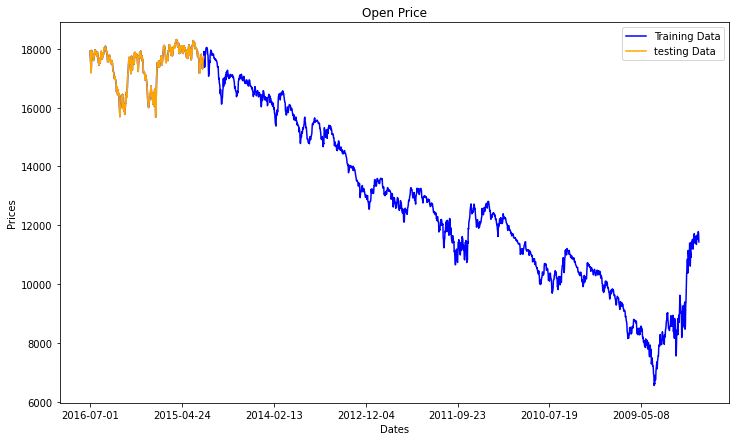

In [80]:
plt.figure(figsize=(12,7))
plt.title('Open Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'orange', label='testing Data')
plt.xticks(np.arange(0,1857, 300), dataset['Date'][0:1857:300])
plt.legend()
plt.show()

## **4. Create a hybrid Model**

In [82]:
import re

In [202]:
news_headline = pd.read_csv('Total_Data.csv', encoding='ISO-8859-1')
news_headline.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [203]:
train = news_headline[news_headline['Date'] < '20150101']
test =news_headline[news_headline['Date'] > '20141231']

In [204]:
train.shape, test.shape

((1863, 27), (378, 27))

In [205]:
train.drop(columns=['Date'],inplace=True,axis=1)
test.drop(columns=['Date'],inplace=True,axis=1)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [206]:
x_train = train.drop(columns=['Label'])
y_train = train['Label']
x_test = test.drop(columns=['Label'])
y_test = test['Label']

In [207]:
x_train.replace('[^a-zA-Z]',' ',regex = True, inplace=True)
x_test.replace('[^a-zA-Z]',' ',regex = True, inplace=True)

In [208]:
col_list = list(x_train.columns)

In [209]:
for col in col_list:
    x_train[col] = x_train[col].str.lower()
    x_test[col] = x_test[col].str.lower()

**4.1 Converting the sentences into lower case**

In [210]:
headlines_train = []
for row in range(0, len(x_train.index)):
    lines = ' '.join(str(k) for k in x_train.iloc[row])
    headlines_train.append(lines)

In [211]:
headlines_test = []
for row in range(0, len(x_test.index)):
    lines = ' '.join(str(k) for k in x_test.iloc[row])
    headlines_test.append(lines)

In [212]:
news_data = pd.read_csv('Total_Data.csv', encoding='ISO-8859-1')
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [213]:
news_data.iloc[:,2:].replace('[^a-zA-Z]',' ',regex = True, inplace=True)

In [214]:
col_list = list(news_data.iloc[:,2:].columns)

In [215]:
for col in col_list:
    news_data[col] = news_data[col].str.lower()

In [216]:
headlines_text = []
for row in range(0, len(news_data.index)):
    lines = ' '.join(str(k) for k in news_data.iloc[row,2:])
    headlines_text.append(lines)

In [217]:
final_headlines_text = []
for i in range(len(headlines_text)):
    final_headlines_text.append(re.sub("b[(')]+", '', headlines_text[i] ))
    final_headlines_text[i] = re.sub('b[(")]+', '', final_headlines_text[i] )
    final_headlines_text[i] = re.sub("\'", '', final_headlines_text[i] )

In [218]:
news_data['Headline_News'] = final_headlines_text

In [219]:
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Headline_News
0,2008-08-08,0,"b""georgia 'downs two russian warplanes' as cou...",b'breaking: musharraf to be impeached.',b'russia today: columns of troops roll into so...,b'russian tanks are moving towards the capital...,"b""afghan children raped with 'impunity,' u.n. ...",b'150 russian tanks have entered south ossetia...,"b""breaking: georgia invades south ossetia, rus...","b""the 'enemy combatent' trials are nothing but...",b'georgian troops retreat from s. osettain cap...,b'did the u.s. prep georgia for war with russia?',b'rice gives green light for israel to attack ...,b'announcing:class action lawsuit on behalf of...,"b""so---russia and georgia are at war and the n...","b""china tells bush to stay out of other countr...",b'did world war iii start today?',b'georgia invades south ossetia - if russia ge...,b'al-qaeda faces islamist backlash',"b'condoleezza rice: ""the us would not act to p...",b'this is a busy day: the european union has ...,"b""georgia will withdraw 1,000 soldiers from ir...",b'why the pentagon thinks attacking iran is a ...,b'caucasus in crisis: georgia invades south os...,b'indian shoe manufactory - and again in a se...,b'visitors suffering from mental illnesses ban...,"b""no help for mexico's kidnapping surge""",georgia downs two russian warplanes as countri...
1,2008-08-11,1,b'why wont america and nato help us? if they w...,b'bush puts foot down on georgian conflict',"b""jewish georgian minister: thanks to israeli ...",b'georgian army flees in disarray as russians ...,"b""olympic opening ceremony fireworks 'faked'""",b'what were the mossad with fraudulent new zea...,b'russia angered by israeli military sale to g...,b'an american citizen living in s.ossetia blam...,b'welcome to world war iv! now in high definit...,"b""georgia's move, a mistake of monumental prop...",b'russia presses deeper into georgia; u.s. say...,b'abhinav bindra wins first ever individual ol...,b' u.s. ship heads for arctic to define territ...,b'drivers in a jerusalem taxi station threaten...,b'the french team is stunned by phelps and the...,b'israel and the us behind the georgian aggres...,"b'""do not believe tv, neither russian nor geor...",b'riots are still going on in montreal (canada...,b'china to overtake us as largest manufacturer',b'war in south ossetia [pics]',b'israeli physicians group condemns state tort...,b' russia has just beaten the united states ov...,b'perhaps *the* question about the georgia - r...,b'russia is so much better at war',"b""so this is what it's come to: trading sex fo...",why wont america and nato help us? if they won...
2,2008-08-12,0,b'remember that adorable 9-year-old who sang a...,"b""russia 'ends georgia operation'""","b'""if we had no sexual harassment we would hav...","b""al-qa'eda is losing support in iraq because ...",b'ceasefire in georgia: putin outmaneuvers the...,b'why microsoft and intel tried to kill the xo...,b'stratfor: the russo-georgian war and the bal...,"b""i'm trying to get a sense of this whole geor...","b""the us military was surprised by the timing ...",b'u.s. beats war drum as iran dumps the dollar',"b'gorbachev: ""georgian military attacked the s...",b'cnn use footage of tskhinvali ruins to cover...,b'beginning a war as the olympics were opening...,b'55 pyramids as large as the luxor stacked in...,b'the 11 top party cities in the world',b'u.s. troops still in georgia (did you know t...,b'why russias response to georgia was right',"b'gorbachev accuses u.s. of making a ""serious ...","b'russia, georgia, and nato: cold war two'",b'remember that adorable 62-year-old who led y...,b'war in georgia: the israeli connection',b'all signs point to the us encouraging georgi...,b'christopher king argues that the us and nato...,b'america: the new mexico?',"b""bbc news | asia-pacific | extinction 'by man...",remember that adorable 9-year-old

In [220]:
unwanted_col = news_data.iloc[:,2:27].columns
unwanted_col

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [221]:
news_data.drop(columns=unwanted_col, inplace=True)
news_data.head()

,Date,Label,Headline_News
0,2008-08-08,0,georgia downs two russian warplanes as countri...
1,2008-08-11,1,why wont america and nato help us? if they won...
2,2008-08-12,0,remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...
4,2008-08-14,1,all the experts admit that we should legalise ...


**4.2 Combining both the datasets**

In [222]:
stock_price = df.copy()
stock_price.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [223]:
hybrid_data = news_data.merge(stock_price, how='inner', on='Date', left_index = True)

hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


**4.3 Sentimental Analysis on New datasets**

In [224]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [225]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['Headline_News']])

In [226]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive


In [229]:
sentimental_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)
hybrid_data = pd.concat([hybrid_data,sentimental_data],axis=1)
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment,positive,positive
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative,0,0
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive,1,1
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative,0,0
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive,1,1
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive,1,1


**4.4 VaderSentimental Analysis**

In [234]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_senti_analysis(text):
    senti_an = SentimentIntensityAnalyzer()
    sentiment = senti_an.polarity_scores(text)
    return sentiment

     |████████████████████████████████| 133kB 2.6MB/s 


In [235]:
compound = []
negative = []
neutral = []
positive = []
sia = 0
for i in range(len(hybrid_data['Headline_News'])):
    sia = get_senti_analysis(hybrid_data['Headline_News'][i])
    compound.append(sia['compound'])
    negative.append(sia['neg'])
    neutral.append(sia['neu'])
    positive.append(sia['pos'])

**4.5 Creating new columns**

In [238]:
hybrid_data['Compound'] = compound
hybrid_data['Negative'] = negative
hybrid_data['Neutral']  = neutral
hybrid_data['Positive'] = positive

In [239]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment,positive,positive,Compound,Negative,Neutral,Positive
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative,0,0,-0.9983,0.212,0.729,0.059
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive,1,1,-0.9977,0.202,0.738,0.061
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative,0,0,-0.9975,0.225,0.684,0.091
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive,1,1,-0.9571,0.132,0.767,0.102
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive,1,1,-0.9644,0.148,0.758,0.094


In [240]:
hybrid_data.columns

Index(['Date', 'Label', 'Headline_News', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Adj Close', 'sentiment', 'positive', 'positive', 'Compound',
       'Negative', 'Neutral', 'Positive'],
      dtype='object')

In [243]:
required_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','Label']
new_hybrid = hybrid_data[required_col]
new_hybrid.reset_index(inplace = True)

In [244]:
new_hybrid.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [245]:
new_hybrid.head()

,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,11432.089844,11759.959961,11388.040039,212830000,-0.9983,0.212,0.729,0.059,0
1,11729.669922,11867.110352,11675.530273,183190000,-0.9977,0.202,0.738,0.061,1
2,11781.700195,11782.349609,11601.519531,173590000,-0.9975,0.225,0.684,0.091,0
3,11632.809570,11633.780273,11453.339844,182550000,-0.9571,0.132,0.767,0.102,0
4,11532.070312,11718.280273,11450.889648,159790000,-0.9644,0.148,0.758,0.094,1


In [247]:
X = new_hybrid.drop('Label', axis=1)  
y = new_hybrid['Label']     

**4.6 Split and Training the datasets**

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### **5. Building the Machine Learning Modes**

**5.1 Logistic Regression**

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logit = LogisticRegression()

logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
metrics.accuracy_score(y_test,y_logit_pred)

0.5100502512562815

**Observation**: Logistic regresssion has a prediction of 51%

**5.2 Random Forest**

In [257]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
metrics.accuracy_score(y_test,y_rf_pred)

0.592964824120603

**Observation**: Random Forest has a prediction of 59%

**5.3 Decision Tree**

In [258]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
metrics.accuracy_score(y_test,y_dt_pred)

0.6155778894472361

**Observation**: Decision Tree has an accuracy of 61%

**5.4 Support Vector Machine**

In [259]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_svc_pred = svc.predict(x_test)
metrics.accuracy_score(y_test,y_svc_pred)

0.5175879396984925

**Observation**: SVM has an accuracy of 51%

**5.5 Naive Bayes**

In [260]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_nb_pred = nb.predict(x_test)
metrics.accuracy_score(y_test,y_nb_pred)


0.5326633165829145

**Observation**: Naive Bayes has an accuracy of 63%

**5.6 K-Nearest Neighbors**

In [262]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
y_neigh_pred = neigh.predict(x_test)
metrics.accuracy_score(y_test,y_neigh_pred)


0.4849246231155779

**Observation**: KNN has an accuracy of 48%.

**5.7 Neural Network**

In [263]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)
y_mlp_pred = mlp.predict(x_test)
metrics.accuracy_score(y_test,y_mlp_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.4849246231155779

**Observation**: Neural Networks has an accuracy of 48%

**Conclusion**: The best model among the seven models is **Decision Tree**